In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pylab
import seaborn as sns
import os
from os import path
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from scipy.cluster.hierarchy import fcluster, fclusterdata, linkage, dendrogram 
import matplotlib.patches as patches
import pickle

# common formatting
plt.style.use('synthetic-enhancer-footprinting.mplstyle')
# plt.style.use('seaborn-white')

import sys  
sys.path.insert(0, '/oak/stanford/groups/wjg/bgrd/papers/synthetic_enhancer_footprinting/code/amplicon-smf/workflow/scripts')

import common

import importlib
importlib.reload(common)
%matplotlib inline

color_dict = {'TetO': '#457FF9', 'minCMV': "0.5", 'TATABox': "0.25"}

import matplotlib.font_manager


Making a plot showing the collapsed (no white space) matrices for E and P.

In [2]:
# define data
datadir = '/oak/stanford/groups/wjg/bgrd/projects/smf/220829_P026_opJS45/results/opjs4'
modeldir = '/oak/stanford/groups/wjg/bgrd/projects/smf/220829_P026_opJS45/model_running'

# plus_dox_samps = ['L241_gSMF52_opJS4_b1_+dox','L245_gSMF56_opJS4_b2_+dox']
plus_dox_samps = ['L241_gSMF52_opJS4_b1_+dox']

amps = ['opJS4_{}x_TetO_21bp_no_CG'.format(i) for i in range(9)]

pos_file = '/oak/stanford/groups/wjg/bgrd/papers/synthetic_enhancer_footprinting/data/positions_files/opJS45.positions.long.txt'
positions = common.load_tfbs_positions(pos_file)

In [3]:
# load data

plus_dox_mats = [pd.concat([common.load_single_molecule_matrix(path.join(datadir, s, 'matrices', '{}.{}.full_unclustered.matrix'.format(s,amp)), name='{}-{}'.format(s, amp)) for s in plus_dox_samps]) for amp in amps]
plus_dox_mats[0]


,31,40,49,53,81,84,96,122,129,158,...,534,543,548,554,560,569,578,581,587,600
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-1,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,0
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8676,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8677,1,1,1,1,1,1,1,0,0,1,...,1,1,0,0,1,0,0,0,0,1
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8678,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,0,0,0
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8679,1,1,1,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
plus_dox_class = [pd.concat([common.load_single_molecule_classification(path.join(modeldir, s, '{}.{}.single_molecule_classification.txt'.format(s,amp)), name='{}-{}'.format(s, amp)) for s in plus_dox_samps]) for amp in amps]
plus_dox_class[0]

,nuc1_present,nuc1_start,nuc1_end,nuc2_present,nuc2_start,nuc2_end,nuc3_present,nuc3_start,nuc3_end,nuc4_present,nuc4_start,nuc4_end,nuc5_present,nuc5_start,nuc5_end
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-0,True,31.0,158.0,True,163.0,276.0,True,280.0,390.0,True,394.0,504.0,True,509.0,620.0
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-1,True,96.0,213.0,True,222.0,331.0,True,394.0,504.0,True,509.0,620.0,NaN,NaN,NaN
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-2,True,31.0,158.0,True,163.0,276.0,True,280.0,390.0,True,394.0,504.0,True,525.0,640.0
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-3,True,31.0,158.0,True,163.0,276.0,True,283.0,394.0,True,398.0,509.0,True,516.0,630.0
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-4,True,158.0,267.0,True,322.0,434.0,True,560.0,670.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8676,True,81.0,197.0,True,331.0,440.0,True,504.0,620.0,NaN,NaN,NaN,NaN,NaN,NaN
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8677,True,331.0,440.0,True,449.0,560.0,True,600.0,710.0,NaN,NaN,NaN,NaN,NaN,NaN
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8678,True,31.0,158.0,True,331.0,440.0,True,449.0,560.0,NaN,NaN,NaN,NaN,NaN,NaN
L241_gSMF52_opJS4_b1_+dox-opJS4_0x_TetO_21bp_no_CG-8679,True,338.0,449.0,True,472.0,581.0,True,587.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# plot single molecules
def plot_dense_single_molecule_matrix(df, annots, ax, enhancer=True, thresh=235):
    df = df[reversed(df.columns.tolist())]
    
    if enhancer:
        df = df[[c for c in df.columns if c > thresh]]
    else:
        df = df[[c for c in df.columns if c < thresh]]
        
    annots['tf_bound'] = annots.filter(like='tfbs_', axis=1).sum(axis=1)==0
    annots['access'] = df.mean(axis=1)
        
    if True:
        order = annots.sort_values(['access','tf_bound']).index
#         order = df.mean(axis=1).sort_values().index
        to_plot = df.loc[order]
    else:
        Z = linkage(df)
        order = dendrogram(Z, no_plot=True)['leaves']
        to_plot = df.iloc[order]
        
    ax.imshow(to_plot, cmap=plt.get_cmap('gray_r'), aspect='auto')#,interpolation='none')
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_yticks([])
#         new_mat[c] = mat[c].map({1:0,0:0.7,-1:1})    


# Running with clustering from figure 1

In [8]:
opens = [39,21,33,13,8,17,28]
tbps = [5,30,20]
tbp_pluss = [27,38,11]
nucs = [10,24,32,0,6,36,23,4,7,25,26,2,18,35,14,22,3,9,19,15,1,34,29,16,12,31,37]
order = opens + tbps + tbp_pluss + nucs

order_df_3 = pd.DataFrame({'cluster': opens+tbps+tbp_pluss+nucs, 'order': [3]*len(opens)+[2]*len(tbps)+[1]*len(tbp_pluss)+[0]*len(nucs)})
order_df = order_df_3

In [9]:
mapper = dict(zip(opens+tbps+tbp_pluss+nucs, list(range(40))))

In [15]:
with open("/oak/stanford/groups/wjg/bgrd/scripts_share/220623_kmeans_40clusters_promotermodel.pkl", "rb") as f:
    model = pickle.load(f)
    
clusters = [model.predict(plus_dox_mat[[c for c in plus_dox_mat.columns if c < 235]]) for plus_dox_mat in plus_dox_mats]
for idx in range(len(plus_dox_class)):
    plus_dox_class[idx]['cluster'] = clusters[idx]


/home/users/jschaepe/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 0.23.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
# plot single molecules
def plot_dense_single_molecule_matrix(df, annots, ax, enhancer=True, thresh=235, o_df=order_df):
    df = df[reversed(df.columns.tolist())]
    
    if enhancer:
        df = df[[c for c in df.columns if c > thresh]]
    else:
        df = df[[c for c in df.columns if c < thresh]]
        
    annots['tf_bound'] = annots.filter(like='tfbs_', axis=1).sum(axis=1)==0
    annots['access'] = df.mean(axis=1)
    annots['prom_access'] = df[[c for c in df.columns if c < 200 and c > 120]].mean(axis=1)
    annots['downstream_access'] = df[[c for c in df.columns if c < 120]].mean(axis=1)
    annots['upstream_access'] = df[[c for c in df.columns if c > 200]].mean(axis=1)
        
    if enhancer:
        order = df.mean(axis=1).sort_values().index.tolist()
        to_plot = df.loc[order]
    else:
        annots['order'] = annots['cluster'].map(mapper)
        order = annots.sort_values('order').index.tolist()
        to_plot = df.loc[order]
        
    ax.imshow(to_plot, cmap=plt.get_cmap('gray_r'), aspect='auto')#,interpolation='none')
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_yticks([])

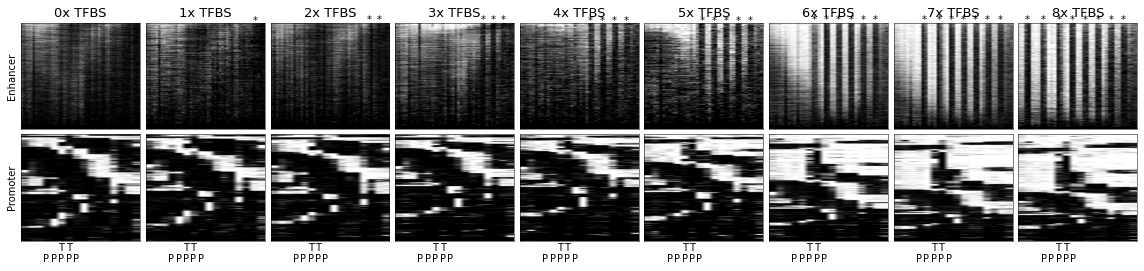

In [18]:
thresh = 235

fig, axs = plt.subplots(2,9,figsize=(20,4),gridspec_kw={'wspace':0.05,'hspace':0.05})
axs = axs.ravel()

for i in range(9):
    df = plus_dox_mats[i]
    df = df.replace({-1:1})
    plot_dense_single_molecule_matrix(df,plus_dox_class[i],axs[i])
    axs[i].set_title('{}x TFBS'.format(i), fontsize=13)
    plot_dense_single_molecule_matrix(df,plus_dox_class[i],axs[i+9],enhancer=False)
    for idx,c in enumerate(reversed([c for c in df.columns if c > thresh])):
        for p in positions[amps[i]]:
            if c > p[0] and c < p[1] and p[2] == 'TetO':
                axs[i].text(idx-.5,10,'*')
    for idx,c in enumerate(reversed([c for c in df.columns if c < thresh])):
        if c in [158,163]:
            axs[i+9].text(idx-0.5,len(df)*1.1,'T')
        if c in [129,158,163,189,197]:
            axs[i+9].text(idx-0.5,len(df)*1.2,'P')



    
axs[0].set_ylabel('Enhancer')
axs[9].set_ylabel('Promoter')
plt.savefig('fig3_plots/enhancer_promoter_collapsed_heatmaps.with_coords.pdf',dpi=600)